In [2]:
import pandas as pd

df = pd.read_csv('../data/credit_risk_dataset.csv')

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.shape

(32581, 12)

In [4]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
# Handle missing values by filling numeric columns with the mean and categorical columns with the mode

# Fill numeric columns with mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [8]:
# Create debt-to-income ratio
df['debt_to_income_ratio'] = df['loan_amnt'] / df['person_income']


In [9]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=[
    'person_home_ownership', 
    'loan_intent', 
    'loan_grade', 
    'cb_person_default_on_file'
], drop_first=True)


In [10]:
# Features (X) and target (y)
X = df.drop(columns=['loan_status'])
y = df['loan_status']


In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

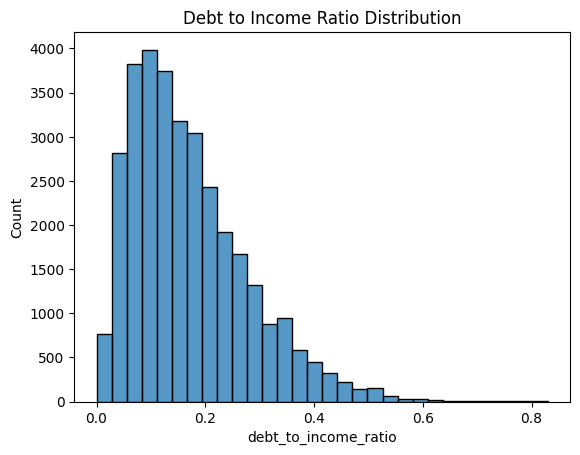

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of debt-to-income ratio
sns.histplot(df['debt_to_income_ratio'], bins=30)
plt.title("Debt to Income Ratio Distribution")
plt.show()

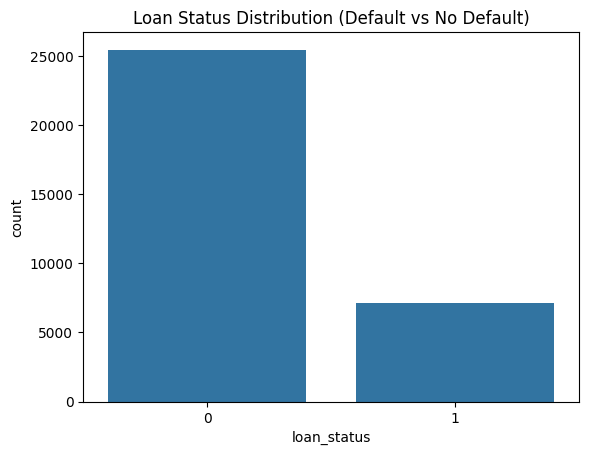

In [14]:
# Distribution of target variable 'loan_status'
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution (Default vs No Default)")
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluate AUC score
lr_auc = roc_auc_score(y_test, lr_probs)
print(f"AUC Score (Logistic Regression): {lr_auc}")


AUC Score (Logistic Regression): 0.8748696964404614


In [16]:
import xgboost as xgb

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate AUC score
xgb_auc = roc_auc_score(y_test, xgb_probs)
print(f"AUC Score (XGBoost): {xgb_auc}")


AUC Score (XGBoost): 0.9513015347166888


In [17]:
# Store AUC scores for comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost'],
    'AUC Score': [lr_auc, xgb_auc]
})

# Save the results to a CSV file
results.to_csv('../reports/auc_scores.csv', index=False)
results

,Model,AUC Score
0,Logistic Regression,0.874870
1,XGBoost,0.951302


In [18]:
import joblib

# Save the best model (XGBoost) to disk
joblib.dump(xgb_model, '../models/final_model.pkl')


['../models/final_model.pkl']

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15]
}

# Initialize RandomForest model
rf = RandomForestClassifier()

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_rf_model = grid_search.best_estimator_

# Save the best model
joblib.dump(best_rf_model, '../models/final_rf_model.pkl')

['../models/final_rf_model.pkl']